## Full optimizer comparison
This post-processing file takes the results from Pareto-optimal scans of the dysts database with different optimizers and varying amounts of noise, as in the example Jupyter notebook 16_dynamical_properties_paper_zeroNoise.ipynb.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
from dysts.base import make_trajectory_ensemble
from dysts.base import get_attractor_list
import dysts.flows as flows
import dysts.datasets as datasets
from dysts.equation_utils import *
import time
from utils import *
import pysindy as ps

path = 'data/'

In [2]:
# Import list of the dynamical properties, sorted alphabetically by the system names

medl_list = np.loadtxt('description_lengths')
lyap_list = np.loadtxt('lyapunov_exponents')
nonlinear_sum = np.loadtxt('nonlinearity_metric')
scale_list_avg = np.loadtxt('scale_separation_metric')
systems_list_cleaned = np.loadtxt('systems_list_cleaned', dtype=str)
num_attractors = len(medl_list)

### Import normalized X_dot RMSE errors and normalized model coefficient errors
This is done for the STLSQ, SR3 (nu = 1 and nu = 0.1), Lasso, and MIOSR optimizers AND the STLSQ optimizer using the weak form!

In [3]:
avg_rmse_error_STLSQ_AIC = np.loadtxt(path + 'avg_rmse_error_STLSQ_AIC')
std_rmse_error_STLSQ_AIC = np.loadtxt(path + 'std_rmse_error_STLSQ_AIC')
avg_coef_error_STLSQ_AIC = np.loadtxt(path + 'avg_coef_error_STLSQ_AIC')
std_coef_error_STLSQ_AIC = np.loadtxt(path + 'std_coef_error_STLSQ_AIC')

avg_rmse_error_SR3_AIC = np.loadtxt(path + 'avg_rmse_error_SR3_AIC')
std_rmse_error_SR3_AIC = np.loadtxt(path + 'std_rmse_error_SR3_AIC')
avg_coef_error_SR3_AIC = np.loadtxt(path + 'avg_coef_error_SR3_AIC')
std_coef_error_SR3_AIC = np.loadtxt(path + 'std_coef_error_SR3_AIC')

avg_rmse_error_SR3_nu01_AIC = np.loadtxt(path + 'avg_rmse_error_SR3_nu1e-1_AIC')
std_rmse_error_SR3_nu01_AIC = np.loadtxt(path + 'std_rmse_error_SR3_nu1e-1_AIC')
avg_coef_error_SR3_nu01_AIC = np.loadtxt(path + 'avg_coef_error_SR3_nu1e-1_AIC')
std_coef_error_SR3_nu01_AIC = np.loadtxt(path + 'std_coef_error_SR3_nu1e-1_AIC')

avg_rmse_error_Lasso_AIC = np.loadtxt(path + 'avg_rmse_error_Lasso_AIC')
std_rmse_error_Lasso_AIC = np.loadtxt(path + 'std_rmse_error_Lasso_AIC')
avg_coef_error_Lasso_AIC = np.loadtxt(path + 'avg_coef_error_Lasso_AIC')
std_coef_error_Lasso_AIC = np.loadtxt(path + 'std_coef_error_Lasso_AIC')

avg_rmse_error_MIOSR_AIC = np.loadtxt(path + 'avg_rmse_error_MIOSR_AIC')
std_rmse_error_MIOSR_AIC = np.loadtxt(path + 'std_rmse_error_MIOSR_AIC')
avg_coef_error_MIOSR_AIC = np.loadtxt(path + 'avg_coef_error_MIOSR_AIC')
std_coef_error_MIOSR_AIC = np.loadtxt(path + 'std_coef_error_MIOSR_AIC')

avg_rmse_error_STLSQ_AIC_01 = np.loadtxt(path + 'avg_rmse_error_STLSQ_AIC_noise01')
std_rmse_error_STLSQ_AIC_01 = np.loadtxt(path + 'std_rmse_error_STLSQ_AIC_noise01')
avg_coef_error_STLSQ_AIC_01 = np.loadtxt(path + 'avg_coef_error_STLSQ_AIC_noise01')
std_coef_error_STLSQ_AIC_01 = np.loadtxt(path + 'std_coef_error_STLSQ_AIC_noise01')

avg_rmse_error_SR3_AIC_01 = np.loadtxt(path + 'avg_rmse_error_SR3_AIC_noise01')
std_rmse_error_SR3_AIC_01 = np.loadtxt(path + 'std_rmse_error_SR3_AIC_noise01')
avg_coef_error_SR3_AIC_01 = np.loadtxt(path + 'avg_coef_error_SR3_AIC_noise01')
std_coef_error_SR3_AIC_01 = np.loadtxt(path + 'std_coef_error_SR3_AIC_noise01')

avg_rmse_error_SR3_nu01_AIC_01 = np.loadtxt(path + 'avg_rmse_error_SR3_nu1e-1_AIC_noise01')
std_rmse_error_SR3_nu01_AIC_01 = np.loadtxt(path + 'std_rmse_error_SR3_nu1e-1_AIC_noise01')
avg_coef_error_SR3_nu01_AIC_01 = np.loadtxt(path + 'avg_coef_error_SR3_nu1e-1_AIC_noise01')
std_coef_error_SR3_nu01_AIC_01 = np.loadtxt(path + 'std_coef_error_SR3_nu1e-1_AIC_noise01')

avg_rmse_error_Lasso_AIC_01 = np.loadtxt(path + 'avg_rmse_error_Lasso_AIC_noise01')
std_rmse_error_Lasso_AIC_01 = np.loadtxt(path + 'std_rmse_error_Lasso_AIC_noise01')
avg_coef_error_Lasso_AIC_01 = np.loadtxt(path + 'avg_coef_error_Lasso_AIC_noise01')
std_coef_error_Lasso_AIC_01 = np.loadtxt(path + 'std_coef_error_Lasso_AIC_noise01')

avg_rmse_error_MIOSR_AIC_01 = np.loadtxt(path + 'avg_rmse_error_MIOSR_AIC_noise01')
std_rmse_error_MIOSR_AIC_01 = np.loadtxt(path + 'std_rmse_error_MIOSR_AIC_noise01')
avg_coef_error_MIOSR_AIC_01 = np.loadtxt(path + 'avg_coef_error_MIOSR_AIC_noise01')
std_coef_error_MIOSR_AIC_01 = np.loadtxt(path + 'std_coef_error_MIOSR_AIC_noise01')

avg_rmse_error_STLSQ_AIC_1 = np.loadtxt(path + 'avg_rmse_error_STLSQ_AIC_noise1')
std_rmse_error_STLSQ_AIC_1 = np.loadtxt(path + 'std_rmse_error_STLSQ_AIC_noise1')
avg_coef_error_STLSQ_AIC_1 = np.loadtxt(path + 'avg_coef_error_STLSQ_AIC_noise1')
std_coef_error_STLSQ_AIC_1 = np.loadtxt(path + 'std_coef_error_STLSQ_AIC_noise1')

avg_rmse_error_SR3_AIC_1 = np.loadtxt(path + 'avg_rmse_error_SR3_AIC_noise1')
std_rmse_error_SR3_AIC_1 = np.loadtxt(path + 'std_rmse_error_SR3_AIC_noise1')
avg_coef_error_SR3_AIC_1 = np.loadtxt(path + 'avg_coef_error_SR3_AIC_noise1')
std_coef_error_SR3_AIC_1 = np.loadtxt(path + 'std_coef_error_SR3_AIC_noise1')

avg_rmse_error_SR3_nu01_AIC_1 = np.loadtxt(path + 'avg_rmse_error_SR3_nu1e-1_AIC_noise1')
std_rmse_error_SR3_nu01_AIC_1 = np.loadtxt(path + 'std_rmse_error_SR3_nu1e-1_AIC_noise1')
avg_coef_error_SR3_nu01_AIC_1 = np.loadtxt(path + 'avg_coef_error_SR3_nu1e-1_AIC_noise1')
std_coef_error_SR3_nu01_AIC_1 = np.loadtxt(path + 'std_coef_error_SR3_nu1e-1_AIC_noise1')

avg_rmse_error_Lasso_AIC_1 = np.loadtxt(path + 'avg_rmse_error_Lasso_AIC_noise1')
std_rmse_error_Lasso_AIC_1 = np.loadtxt(path + 'std_rmse_error_Lasso_AIC_noise1')
avg_coef_error_Lasso_AIC_1 = np.loadtxt(path + 'avg_coef_error_Lasso_AIC_noise1')
std_coef_error_Lasso_AIC_1 = np.loadtxt(path + 'std_coef_error_Lasso_AIC_noise1')

avg_rmse_error_MIOSR_AIC_1 = np.loadtxt(path + 'avg_rmse_error_MIOSR_AIC_noise1')
std_rmse_error_MIOSR_AIC_1 = np.loadtxt(path + 'std_rmse_error_MIOSR_AIC_noise1')
avg_coef_error_MIOSR_AIC_1 = np.loadtxt(path + 'avg_coef_error_MIOSR_AIC_noise1')
std_coef_error_MIOSR_AIC_1 = np.loadtxt(path + 'std_coef_error_MIOSR_AIC_noise1')

# import weak form results with STLSQ
avg_rmse_error_STLSQ_AICwf = np.loadtxt(path + 'avg_rmse_error_strong_STLSQ_AIC_weakform_noise0')
std_rmse_error_STLSQ_AICwf = np.loadtxt(path + 'std_rmse_error_STLSQ_AIC_weakform_noise0')
avg_coef_error_STLSQ_AICwf = np.loadtxt(path + 'avg_coef_error_STLSQ_AIC_weakform_noise0')
std_coef_error_STLSQ_AICwf = np.loadtxt(path + 'std_coef_error_STLSQ_AIC_weakform_noise0')

avg_rmse_error_STLSQ_AICwf_01 = np.loadtxt(path + 'avg_rmse_error_strong_STLSQ_AIC_weakform_noise01')
std_rmse_error_STLSQ_AICwf_01 = np.loadtxt(path + 'std_rmse_error_STLSQ_AIC_weakform_noise01')
avg_coef_error_STLSQ_AICwf_01 = np.loadtxt(path + 'avg_coef_error_STLSQ_AIC_weakform_noise01')
std_coef_error_STLSQ_AICwf_01 = np.loadtxt(path + 'std_coef_error_STLSQ_AIC_weakform_noise01')

avg_rmse_error_STLSQ_AICwf_1 = np.loadtxt(path + 'avg_rmse_error_strong_STLSQ_AIC_weakform_noise1')
std_rmse_error_STLSQ_AICwf_1 = np.loadtxt(path + 'std_rmse_error_STLSQ_AIC_weakform_noise1')
avg_coef_error_STLSQ_AICwf_1 = np.loadtxt(path + 'avg_coef_error_STLSQ_AIC_weakform_noise1')
std_coef_error_STLSQ_AICwf_1 = np.loadtxt(path + 'std_coef_error_STLSQ_AIC_weakform_noise1')

### Plot all the errors for all the optimizers and all the systems, on a single figure!
First plot will be all the results when the data is clean -- no added noise.

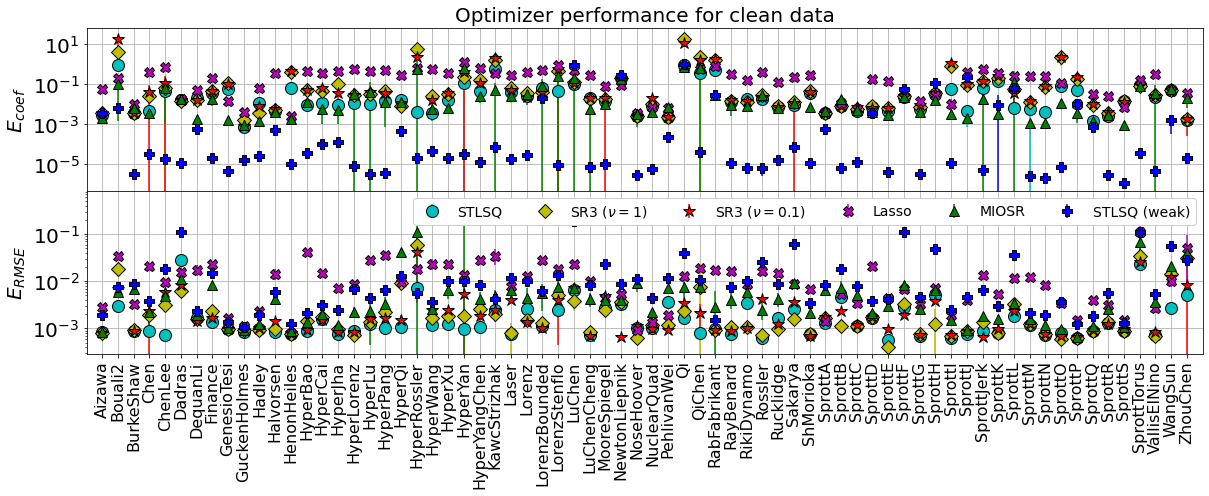

In [4]:
import matplotlib.gridspec as gridspec

ms = 10
plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(2, 1, hspace=0, wspace=0)
plt.subplot(gs[0])
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_STLSQ_AIC,
    std_coef_error_STLSQ_AIC,
    fmt="co",
    label="STLSQ",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_SR3_AIC,
    std_coef_error_SR3_AIC,
    fmt="yD",
    label="SR3",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_SR3_nu01_AIC,
    std_coef_error_SR3_nu01_AIC,
    fmt="r*",
    label=r"SR3 $\nu = 0.1$",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_Lasso_AIC,
    std_coef_error_Lasso_AIC,
    fmt="mX",
    label="Lasso",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_MIOSR_AIC,
    std_coef_error_MIOSR_AIC,
    fmt="g^",
    label="MIOSR",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_STLSQ_AICwf,
    std_coef_error_STLSQ_AICwf,
    fmt="bP",
    label="STLSQ (weak)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.grid(True)
plt.yscale("log")
ax = plt.gca()
plt.xticks(np.arange(num_attractors), rotation="vertical", fontsize=16)
plt.xlim(-1, num_attractors)
ax.set_xticklabels([])
plt.yticks(fontsize=20)
plt.ylabel(r"$E_{coef}$", fontsize=20)
plt.title('Optimizer performance for clean data', fontsize=20)

plt.subplot(gs[1])
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_STLSQ_AIC,
    std_rmse_error_STLSQ_AIC,
    fmt="co",
    label="STLSQ",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_SR3_AIC,
    std_rmse_error_SR3_AIC,
    fmt="yD",
    label=r"SR3 ($\nu = 1$)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_SR3_nu01_AIC,
    std_rmse_error_SR3_nu01_AIC,
    fmt="r*",
    label=r"SR3 ($\nu = 0.1$)",
    markersize=ms + 2,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_Lasso_AIC,
    std_rmse_error_Lasso_AIC,
    fmt="mX",
    label="Lasso",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_MIOSR_AIC,
    std_rmse_error_MIOSR_AIC,
    fmt="g^",
    label="MIOSR",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_STLSQ_AICwf,
    std_rmse_error_STLSQ_AICwf,
    fmt="bP",
    label="STLSQ (weak)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.grid(True)
plt.yscale("log")
plt.legend(
    framealpha=1.0,
    ncol=6,
    fontsize=14,
)
plt.ylabel(r"$E_{RMSE}$", fontsize=20)
ax = plt.gca()
plt.xticks(np.arange(num_attractors), rotation="vertical", fontsize=16)
plt.xlim(-1, num_attractors)
ax.set_xticklabels(np.array(systems_list_cleaned))
plt.yticks(fontsize=20)
plt.savefig("Pictures/optimizer_comparison_AIC.pdf", bbox_inches = "tight")

### Plot all the errors for all the optimizers and all the systems, on a single figure!
Second plot will be all the results when the data has 0.1% Gaussian noise added to every point.

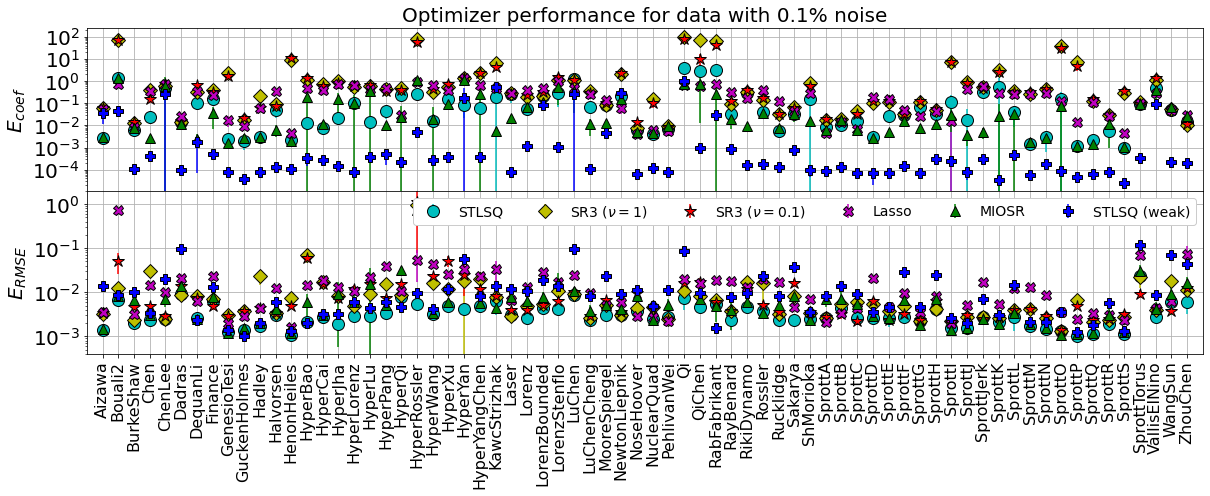

In [5]:
plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(2, 1, hspace=0, wspace=0)
plt.subplot(gs[0])
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_STLSQ_AIC_01,
    std_coef_error_STLSQ_AIC_01,
    fmt="co",
    label="STLSQ",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_SR3_AIC_01,
    std_coef_error_SR3_AIC_01,
    fmt="yD",
    label="SR3",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_SR3_nu01_AIC_01,
    std_coef_error_SR3_nu01_AIC_01,
    fmt="r*",
    label=r"SR3 $\nu = 0.1$",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_Lasso_AIC_01,
    std_coef_error_Lasso_AIC_01,
    fmt="mX",
    label="Lasso",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_MIOSR_AIC_01,
    std_coef_error_MIOSR_AIC_01,
    fmt="g^",
    label="MIOSR",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_STLSQ_AICwf_01,
    std_coef_error_STLSQ_AICwf_01,
    fmt="bP",
    label="STLSQ (weak)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.grid(True)
plt.yscale("log")
ax = plt.gca()
plt.xticks(np.arange(num_attractors), rotation="vertical", fontsize=16)
plt.xlim(-1, num_attractors)
ax.set_xticklabels([])
plt.yticks(fontsize=20)
plt.ylabel(r"$E_{coef}$", fontsize=20)
plt.title('Optimizer performance for data with 0.1% noise', fontsize=20)

plt.subplot(gs[1])
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_STLSQ_AIC_01,
    std_rmse_error_STLSQ_AIC_01,
    fmt="co",
    label="STLSQ",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_SR3_AIC_01,
    std_rmse_error_SR3_AIC_01,
    fmt="yD",
    label=r"SR3 ($\nu = 1$)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_SR3_nu01_AIC_01,
    std_rmse_error_SR3_nu01_AIC_01,
    fmt="r*",
    label=r"SR3 ($\nu = 0.1$)",
    markersize=ms + 2,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_Lasso_AIC_01,
    std_rmse_error_Lasso_AIC_01,
    fmt="mX",
    label="Lasso",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_MIOSR_AIC_01,
    std_rmse_error_MIOSR_AIC_01,
    fmt="g^",
    label="MIOSR",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_STLSQ_AICwf_01,
    std_rmse_error_STLSQ_AICwf_01,
    fmt="bP",
    label="STLSQ (weak)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.grid(True)
plt.yscale("log")
plt.legend(
    framealpha=1.0,
    ncol=6,
    fontsize=14,
)
plt.ylabel(r"$E_{RMSE}$", fontsize=20)
ax = plt.gca()
plt.xticks(np.arange(num_attractors), rotation="vertical", fontsize=16)
plt.xlim(-1, num_attractors)
ax.set_xticklabels(np.array(systems_list_cleaned))
plt.yticks(fontsize=20)
plt.ylim(4e-4, 2)
plt.savefig("Pictures/optimizer_comparison_01percentnoise.pdf", bbox_inches = "tight")

### Plot all the errors for all the optimizers and all the systems, on a single figure!
Third plot will be all the results when the data has 1% Gaussian noise added to every point.

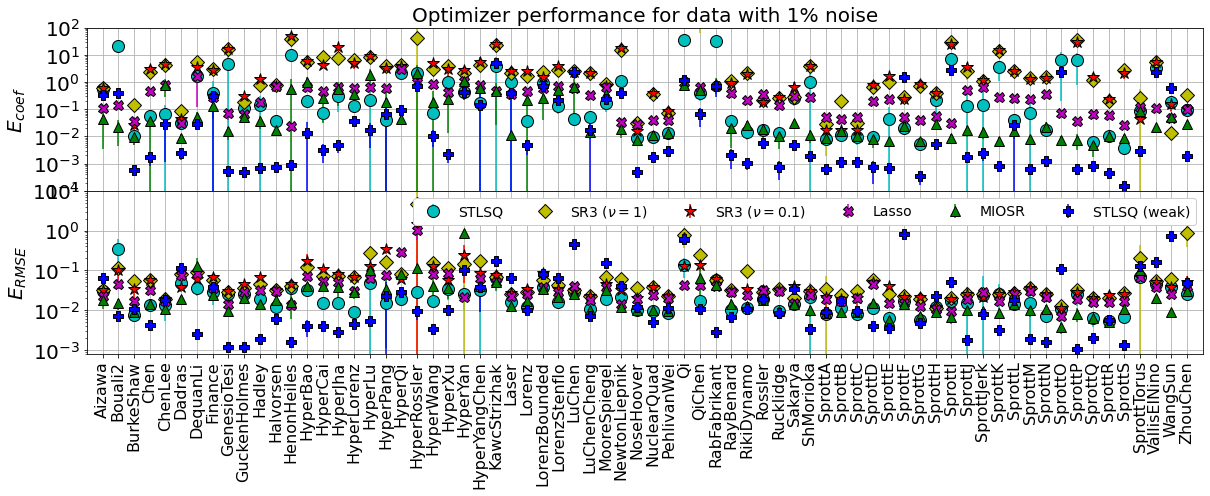

In [6]:
plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(2, 1, hspace=0, wspace=0)
plt.subplot(gs[0])
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_STLSQ_AIC_1,
    std_coef_error_STLSQ_AIC_1,
    fmt="co",
    label="STLSQ",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_SR3_AIC_1,
    std_coef_error_SR3_AIC_1,
    fmt="yD",
    label="SR3",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_SR3_nu01_AIC_1,
    std_coef_error_SR3_nu01_AIC_1,
    fmt="r*",
    label=r"SR3 $\nu = 0.1$",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_Lasso_AIC_1,
    std_coef_error_Lasso_AIC_1,
    fmt="mX",
    label="Lasso",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_MIOSR_AIC_1,
    std_coef_error_MIOSR_AIC_1,
    fmt="g^",
    label="MIOSR",
    markersize=ms,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_coef_error_STLSQ_AICwf_1,
    std_coef_error_STLSQ_AICwf_1,
    fmt="bP",
    label="STLSQ (weak)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.grid(True)
plt.yscale("log")
plt.ylim(1e-4, 1e2)
ax = plt.gca()
plt.xticks(np.arange(num_attractors), rotation="vertical", fontsize=16)
plt.xlim(-1, num_attractors)
ax.set_xticklabels([])
plt.yticks(fontsize=20)
plt.ylabel(r"$E_{coef}$", fontsize=20)
plt.title('Optimizer performance for data with 1% noise', fontsize=20)

plt.subplot(gs[1])
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_STLSQ_AIC_1,
    std_rmse_error_STLSQ_AIC_1,
    fmt="co",
    label="STLSQ",
    markersize=ms + 2,
    markeredgecolor='k'
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_SR3_AIC_1,
    std_rmse_error_SR3_AIC_1,
    fmt="yD",
    label=r"SR3 ($\nu = 1$)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_SR3_nu01_AIC_1,
    std_rmse_error_SR3_nu01_AIC_1,
    fmt="r*",
    label=r"SR3 ($\nu = 0.1$)",
    markersize=ms + 2,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_Lasso_AIC_1,
    std_rmse_error_Lasso_AIC_1,
    fmt="mX",
    label="Lasso",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_MIOSR_AIC_1,
    std_rmse_error_MIOSR_AIC_1,
    fmt="g^",
    label="MIOSR",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.errorbar(
    np.arange(num_attractors),
    avg_rmse_error_STLSQ_AICwf_1,
    std_rmse_error_STLSQ_AICwf_1,
    fmt="bP",
    label="STLSQ (weak)",
    markersize=ms,
    markeredgecolor='k',
#     alpha=0.7
)
plt.grid(True)
plt.yscale("log")
plt.legend(
    #["10% normalized error", "$E_{coef}$", "$E_{RMSE}$", "Optimal threshold"],
    framealpha=1.0,
    ncol=6,
    fontsize=14,
    loc='upper right'
)
plt.ylabel(r"$E_{RMSE}$", fontsize=20)
ax = plt.gca()
plt.xticks(np.arange(num_attractors), rotation="vertical", fontsize=16)
plt.xlim(-1, num_attractors)
ax.set_xticklabels(np.array(systems_list_cleaned))
plt.yticks(fontsize=20)
plt.ylim(0.8e-3, 1e1)
plt.savefig("Pictures/optimizer_comparison_1percentnoise.pdf", bbox_inches = "tight")

### Summarize the mean and median errors, now computed across all the dynamical systems
This gives an overall error performance for each optimizer, for each noise level, which can be plotted against the computational time used by the optimization algorithm.

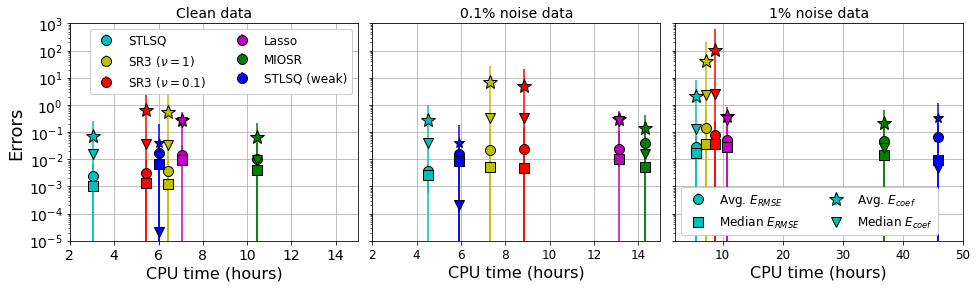

In [21]:
plt.figure(figsize=(16, 4))
gs = gridspec.GridSpec(1, 3, hspace=0, wspace=0.05)
plt.subplot(gs[0])
plt.grid(True)
plt.yscale('log')
plt.ylabel("Errors", fontsize=18)
plt.title('Clean data', fontsize=14)
plt.errorbar(10936 / 3600, np.mean(avg_rmse_error_STLSQ_AIC), np.std(avg_rmse_error_STLSQ_AIC), fmt="co", label=r"STLSQ", markersize=ms, markeredgecolor='k')
plt.errorbar(23120 / 3600, np.mean(avg_rmse_error_SR3_AIC), np.std(avg_rmse_error_SR3_AIC), fmt="yo", label=r"SR3 ($\nu = 1$)", markersize=ms, markeredgecolor='k')
plt.errorbar(19604 / 3600, np.mean(avg_rmse_error_SR3_nu01_AIC), np.std(avg_rmse_error_SR3_nu01_AIC), label=r"SR3 ($\nu = 0.1$)", fmt="ro", markersize=ms, markeredgecolor='k')
plt.errorbar(25464 / 3600, np.mean(avg_rmse_error_Lasso_AIC), np.std(avg_rmse_error_Lasso_AIC), fmt="mo", label=r"Lasso", markersize=ms, markeredgecolor='k')
plt.errorbar(37662 / 3600, np.mean(avg_rmse_error_MIOSR_AIC), np.std(avg_rmse_error_MIOSR_AIC), fmt="go", label=r"MIOSR", markersize=ms, markeredgecolor='k')
plt.errorbar(21606 / 3600, np.mean(avg_rmse_error_STLSQ_AICwf), np.std(avg_rmse_error_STLSQ_AICwf), fmt="bo", label=r"STLSQ (weak)", markersize=ms, markeredgecolor='k')
plt.legend(framealpha=1.0, fontsize=12, ncol=2, loc='best')

plt.subplot(gs[1])
plt.grid(True)
plt.yscale('log')
plt.title('0.1% noise data', fontsize=14)
plt.errorbar(16311 / 3600, np.mean(avg_rmse_error_STLSQ_AIC_01), np.std(avg_rmse_error_STLSQ_AIC_01), fmt="co", label=r"Avg. $E_{RMSE}$ (0.1% noise)", markersize=ms, markeredgecolor='k')
plt.errorbar(26270 / 3600, np.mean(avg_rmse_error_SR3_AIC_01), np.std(avg_rmse_error_SR3_AIC_01), fmt="yo", markersize=ms, markeredgecolor='k')
plt.errorbar(31907 / 3600, np.mean(avg_rmse_error_SR3_nu01_AIC_01), np.std(avg_rmse_error_SR3_nu01_AIC_01), fmt="ro", markersize=ms, markeredgecolor='k')
plt.errorbar(47287 / 3600, np.mean(avg_rmse_error_Lasso_AIC_01), np.std(avg_rmse_error_Lasso_AIC_01), fmt="mo", markersize=ms, markeredgecolor='k')
plt.errorbar(51481 / 3600, np.mean(avg_rmse_error_MIOSR_AIC_01), np.std(avg_rmse_error_MIOSR_AIC_01), fmt="go", markersize=ms, markeredgecolor='k')
plt.errorbar(21208 / 3600, np.mean(avg_rmse_error_STLSQ_AICwf_01), np.std(avg_rmse_error_STLSQ_AICwf_01), fmt="bo", markersize=ms, markeredgecolor='k')

plt.subplot(gs[2])
plt.grid(True)
plt.yscale('log')
plt.title('1% noise data', fontsize=14)
plt.errorbar(19767 / 3600, np.mean(avg_rmse_error_STLSQ_AIC_1), np.std(avg_rmse_error_STLSQ_AIC_1), fmt="co", label=r"Avg. $E_{RMSE}$", markersize=ms, markeredgecolor='k')
plt.errorbar(26017 / 3600, np.mean(avg_rmse_error_SR3_AIC_1), np.std(avg_rmse_error_SR3_AIC_1), fmt="yo", markersize=ms, markeredgecolor='k')
plt.errorbar(31447 / 3600, np.mean(avg_rmse_error_SR3_nu01_AIC_1), np.std(avg_rmse_error_SR3_nu01_AIC_1), fmt="ro", markersize=ms, markeredgecolor='k')
plt.errorbar(38549 / 3600, np.mean(avg_rmse_error_Lasso_AIC_1), np.std(avg_rmse_error_Lasso_AIC_1), fmt="mo", markersize=ms, markeredgecolor='k')
plt.errorbar(132848 / 3600, np.mean(avg_rmse_error_MIOSR_AIC_1), np.std(avg_rmse_error_MIOSR_AIC_1), fmt="go", markersize=ms, markeredgecolor='k')
plt.errorbar(165048 / 3600, np.mean(avg_rmse_error_STLSQ_AICwf_1), np.std(avg_rmse_error_STLSQ_AICwf_1), fmt="bo", markersize=ms, markeredgecolor='k')

plt.subplot(gs[0])
plt.ylim(1e-5, 1e3)
plt.errorbar(10936 / 3600, np.median(avg_rmse_error_STLSQ_AIC), fmt="cs", label=r"Median $E_{RMSE}$ (clean)", markersize=ms, markeredgecolor='k')
plt.errorbar(23120 / 3600, np.median(avg_rmse_error_SR3_AIC), fmt="ys", markersize=ms, markeredgecolor='k')
plt.errorbar(19604 / 3600, np.median(avg_rmse_error_SR3_nu01_AIC), fmt="rs", markersize=ms, markeredgecolor='k')
plt.errorbar(25464 / 3600, np.median(avg_rmse_error_Lasso_AIC), fmt="ms", markersize=ms, markeredgecolor='k')
plt.errorbar(37662 / 3600, np.median(avg_rmse_error_MIOSR_AIC), fmt="gs", markersize=ms, markeredgecolor='k')
plt.errorbar(21606 / 3600, np.median(avg_rmse_error_STLSQ_AICwf), fmt="bs", markersize=ms, markeredgecolor='k')

plt.subplot(gs[1])
plt.ylim(1e-5, 1e3)
ax = plt.gca()
ax.set_yticklabels([])
plt.errorbar(16311 / 3600, np.median(avg_rmse_error_STLSQ_AIC_01), fmt="cs", label=r"Median $E_{RMSE}$ (0.1% noise)", markersize=ms, markeredgecolor='k')
plt.errorbar(26270 / 3600, np.median(avg_rmse_error_SR3_AIC_01), fmt="ys", markersize=ms, markeredgecolor='k')
plt.errorbar(31907 / 3600, np.median(avg_rmse_error_SR3_nu01_AIC_01), fmt="rs", markersize=ms, markeredgecolor='k')
plt.errorbar(47287 / 3600, np.median(avg_rmse_error_Lasso_AIC_01), fmt="ms", markersize=ms, markeredgecolor='k')
plt.errorbar(51481 / 3600, np.median(avg_rmse_error_MIOSR_AIC_01), fmt="gs", markersize=ms, markeredgecolor='k')
plt.errorbar(21208 / 3600, np.median(avg_rmse_error_STLSQ_AICwf_01), fmt="bs", markersize=ms, markeredgecolor='k')

plt.subplot(gs[2])
plt.ylim(1e-5, 1e3)
ax = plt.gca()
ax.set_yticklabels([])
plt.errorbar(19767 / 3600, np.median(avg_rmse_error_STLSQ_AIC_1), fmt="cs", label=r"Median $E_{RMSE}$", markersize=ms, markeredgecolor='k')
plt.errorbar(26017 / 3600, np.median(avg_rmse_error_SR3_AIC_1), fmt="ys", markersize=ms, markeredgecolor='k')
plt.errorbar(31447 / 3600, np.median(avg_rmse_error_SR3_nu01_AIC_1), fmt="rs", markersize=ms, markeredgecolor='k')
plt.errorbar(38549 / 3600, np.median(avg_rmse_error_Lasso_AIC_1), fmt="ms", markersize=ms, markeredgecolor='k')
plt.errorbar(132848 / 3600, np.median(avg_rmse_error_MIOSR_AIC_1), fmt="gs", markersize=ms, markeredgecolor='k')
plt.errorbar(165048 / 3600, np.median(avg_rmse_error_STLSQ_AICwf_1), fmt="bs", markersize=ms, markeredgecolor='k')

plt.subplot(gs[0])
plt.xlabel("CPU time (hours)", fontsize=16)
plt.errorbar(10936 / 3600, np.mean(avg_coef_error_STLSQ_AIC), np.std(avg_coef_error_STLSQ_AIC), fmt="c*", label=r"Avg. $E_{coef}$", markersize=ms+5, markeredgecolor='k')
plt.errorbar(23120 / 3600, np.mean(avg_coef_error_SR3_AIC), np.std(avg_coef_error_SR3_AIC), fmt="y*", markersize=ms+5, markeredgecolor='k') #, label=r"SR3 ($\nu = 1$)")
plt.errorbar(19604 / 3600, np.mean(avg_coef_error_SR3_nu01_AIC), np.std(avg_coef_error_SR3_nu01_AIC), fmt="r*", markersize=ms+5, markeredgecolor='k') #, label=r"SR3 ($\nu = 0.1$)")
plt.errorbar(25464 / 3600, np.mean(avg_coef_error_Lasso_AIC), np.std(avg_coef_error_Lasso_AIC), fmt="m*", markersize=ms+5, markeredgecolor='k') #, label="Lasso")
plt.errorbar(37662 / 3600, np.mean(avg_coef_error_MIOSR_AIC), np.std(avg_coef_error_MIOSR_AIC), fmt="g*", markersize=ms+5, markeredgecolor='k') #, label="MIOSR")
plt.errorbar(21606 / 3600, np.mean(avg_coef_error_STLSQ_AICwf), np.std(avg_coef_error_STLSQ_AICwf), fmt="b*", markersize=ms, markeredgecolor='k')

plt.subplot(gs[1])
plt.xlabel("CPU time (hours)", fontsize=16)
plt.errorbar(16311 / 3600, np.mean(avg_coef_error_STLSQ_AIC_01), np.std(avg_coef_error_STLSQ_AIC_01), fmt="c*", label=r"Avg. $E_{coef}$ (0.1% noise)", markersize=ms+5, markeredgecolor='k')
plt.errorbar(26270 / 3600, np.mean(avg_coef_error_SR3_AIC_01), np.std(avg_coef_error_SR3_AIC_01), fmt="y*", markersize=ms+5, markeredgecolor='k') #, label=r"SR3 ($\nu = 1$)")
plt.errorbar(31907 / 3600, np.mean(avg_coef_error_SR3_nu01_AIC_01), np.std(avg_coef_error_SR3_nu01_AIC_01), fmt="r*", markersize=ms+5, markeredgecolor='k') #, label=r"SR3 ($\nu = 0.1$)")
plt.errorbar(47287 / 3600, np.mean(avg_coef_error_Lasso_AIC_01), np.std(avg_coef_error_Lasso_AIC_01), fmt="m*", markersize=ms+5, markeredgecolor='k') #, label="Lasso")
plt.errorbar(51481 / 3600, np.mean(avg_coef_error_MIOSR_AIC_01), np.std(avg_coef_error_MIOSR_AIC_01), fmt="g*", markersize=ms+5, markeredgecolor='k') #, label="MIOSR")
plt.errorbar(21208 / 3600, np.mean(avg_coef_error_STLSQ_AICwf_01), np.std(avg_coef_error_STLSQ_AICwf_01), fmt="b*", markersize=ms, markeredgecolor='k')

plt.subplot(gs[2])
plt.errorbar(19767 / 3600, np.mean(avg_coef_error_STLSQ_AIC_1), np.std(avg_coef_error_STLSQ_AIC_1), fmt="c*", label=r"Avg. $E_{coef}$", markersize=ms+5, markeredgecolor='k')
plt.errorbar(26017 / 3600, np.mean(avg_coef_error_SR3_AIC_1), np.std(avg_coef_error_SR3_AIC_1), fmt="y*", markersize=ms+5, markeredgecolor='k') #, label=r"SR3 ($\nu = 1$)")
plt.errorbar(31447 / 3600, np.mean(avg_coef_error_SR3_nu01_AIC_1), np.std(avg_coef_error_SR3_nu01_AIC_1), fmt="r*", markersize=ms+5, markeredgecolor='k') #, label=r"SR3 ($\nu = 0.1$)")
plt.errorbar(38549 / 3600, np.mean(avg_coef_error_Lasso_AIC_1), np.std(avg_coef_error_Lasso_AIC_1), fmt="m*", markersize=ms+5, markeredgecolor='k') #, label="Lasso")
plt.errorbar(132848 / 3600, np.mean(avg_coef_error_MIOSR_AIC_1), np.std(avg_coef_error_MIOSR_AIC_1), fmt="g*", markersize=ms+5, markeredgecolor='k') #, label="MIOSR")
plt.errorbar(165048 / 3600, np.mean(avg_coef_error_STLSQ_AICwf_1), np.std(avg_coef_error_STLSQ_AICwf_1), fmt="b*", markersize=ms, markeredgecolor='k')

plt.subplot(gs[0])
plt.xlim(2, 15)
plt.errorbar(10936 / 3600, np.median(avg_coef_error_STLSQ_AIC), fmt="cv", label=r"Median $E_{coef}$", markersize=ms, markeredgecolor='k')
plt.errorbar(23120 / 3600, np.median(avg_coef_error_SR3_AIC), fmt="yv", markersize=ms, markeredgecolor='k')
plt.errorbar(19604 / 3600, np.median(avg_coef_error_SR3_nu01_AIC), fmt="rv", markersize=ms, markeredgecolor='k')
plt.errorbar(25464 / 3600, np.median(avg_coef_error_Lasso_AIC), fmt="mv", markersize=ms, markeredgecolor='k')
plt.errorbar(37662 / 3600, np.median(avg_coef_error_MIOSR_AIC), fmt="gv", markersize=ms, markeredgecolor='k')
plt.errorbar(21606 / 3600, np.median(avg_coef_error_STLSQ_AICwf), fmt="bv", markersize=ms, markeredgecolor='k')

plt.subplot(gs[1])
plt.xlim(2, 15)
plt.xticks(fontsize=12)
plt.errorbar(16311 / 3600, np.median(avg_coef_error_STLSQ_AIC_01), fmt="cv", label=r"Median $E_{coef}$", markersize=ms, markeredgecolor='k')
plt.errorbar(26270 / 3600, np.median(avg_coef_error_SR3_AIC_01), fmt="yv", markersize=ms, markeredgecolor='k')
plt.errorbar(31907 / 3600, np.median(avg_coef_error_SR3_nu01_AIC_01), fmt="rv", markersize=ms, markeredgecolor='k')
plt.errorbar(47287 / 3600, np.median(avg_coef_error_Lasso_AIC_01), fmt="mv", markersize=ms, markeredgecolor='k')
plt.errorbar(51481 / 3600, np.median(avg_coef_error_MIOSR_AIC_01), fmt="gv", markersize=ms, markeredgecolor='k')
plt.errorbar(21208 / 3600, np.median(avg_coef_error_STLSQ_AICwf_01), fmt="bv", markersize=ms, markeredgecolor='k')

plt.subplot(gs[2])
plt.xticks(fontsize=12)
plt.errorbar(19767 / 3600, np.median(avg_coef_error_STLSQ_AIC_1), fmt="cv", label=r"Median $E_{coef}$", markersize=ms, markeredgecolor='k')
plt.errorbar(26017 / 3600, np.median(avg_coef_error_SR3_AIC_1), fmt="yv", markersize=ms, markeredgecolor='k')
plt.errorbar(31447 / 3600, np.median(avg_coef_error_SR3_nu01_AIC_1), fmt="rv", markersize=ms, markeredgecolor='k')
plt.errorbar(38549 / 3600, np.median(avg_coef_error_Lasso_AIC_1), fmt="mv", markersize=ms, markeredgecolor='k')
plt.errorbar(132848 / 3600, np.median(avg_coef_error_MIOSR_AIC_1), fmt="gv", markersize=ms, markeredgecolor='k')
plt.errorbar(165048 / 3600, np.median(avg_coef_error_STLSQ_AICwf_1), fmt="bv", markersize=ms, markeredgecolor='k')

# plt.xscale('log')
plt.xlim(2, 50)
plt.xlabel("CPU time (hours)", fontsize=16)
plt.legend(framealpha=1.0, fontsize=12, ncol=2)
# plt.title('Average optimizer performance vs run time', fontsize=14)
#plt.ylim(5e-4, 1e2)
plt.subplot(gs[0])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('Pictures/optimizer_error_summary.pdf')
plt.show()

### Take errors from one of the optimizer results, and plot how the performance depends on the dynamical properties
In this work we consider the level of chaos (maximum Lypanuov exponent), the degree of scale separation (measured as a ratio of the dominant timescale and the dt parameter), the degree of nonlinearity, and the syntactic complexity (the mean-equation description length as used in the AI Feynman 2.0 paper).

R^2 value for RMSE error =  0.5047684847760464
Log-Linear R^2 value for RMSE error =  0.5797006017677724
Log-Log R^2 value for RMSE error =  0.2799782709671176
R^2 value for coef error =  0.01620149939681451
Chaos
R^2 value for RMSE error =  0.0005950352537578985
Log-Linear R^2 value for RMSE error =  0.005933504488331089
Log-Log R^2 value for RMSE error =  0.025336709934752448
R^2 value for coef error =  0.0015926125045867031
Syntax
R^2 value for RMSE error =  0.005424736726136274
Log-Linear R^2 value for RMSE error =  0.0056928937645284025
Log-Log R^2 value for RMSE error =  0.002200185641987309
R^2 value for coef error =  0.00026864401328655275
Nonlinearity
R^2 value for RMSE error =  0.003965356654306157
Log-Linear R^2 value for RMSE error =  0.005064944031035272
Log-Log R^2 value for RMSE error =  0.003663383448945649
R^2 value for coef error =  0.0004956056346803003


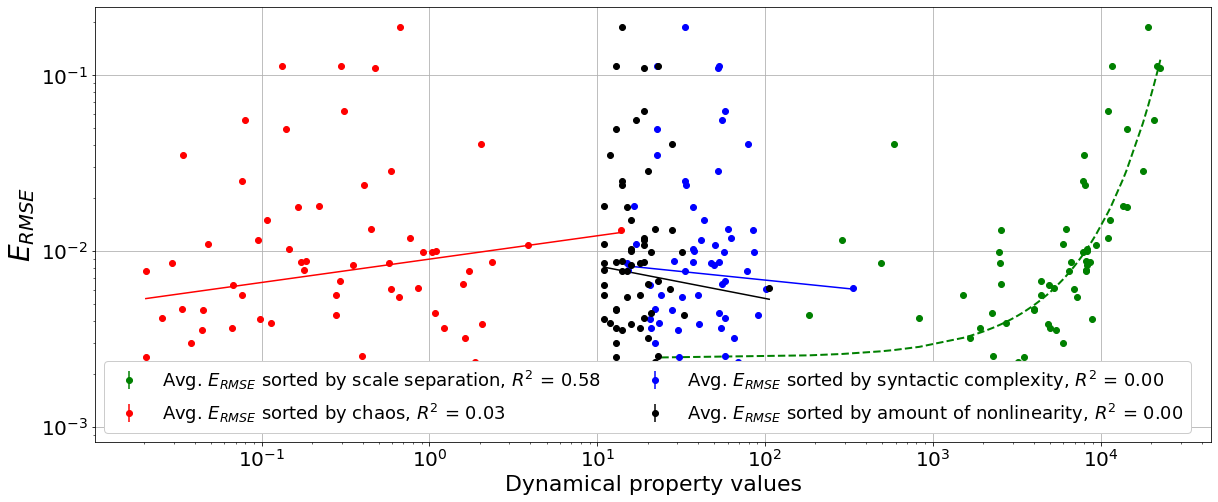

In [8]:
from scipy.stats import linregress

# get the errors from one of the optimizer results
cerrs = avg_coef_error_STLSQ_AICwf
avg_rmse_error = avg_rmse_error_STLSQ_AICwf
std_rmse_error = std_rmse_error_STLSQ_AICwf

# reorder things by the amount of scale separation and then plot performance + fits
scale_sort = np.argsort(scale_list_avg)
scale_list_sorted = np.sort(scale_list_avg)
slope, intercept, r_value, p_value, std_err = linregress(
    scale_list_sorted, avg_rmse_error[scale_sort]
)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
    scale_list_sorted, np.log(avg_rmse_error[scale_sort])
)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
    np.log(scale_list_sorted), np.log(avg_rmse_error[scale_sort])
)
slope_coef, intercept_coef, r_value_coef, p_value_coef, std_err_coef = linregress(
    scale_list_sorted, cerrs[scale_sort]
)
print("R^2 value for RMSE error = ", r_value**2)
print("Log-Linear R^2 value for RMSE error = ", r_value1**2)
print("Log-Log R^2 value for RMSE error = ", r_value2**2)
print("R^2 value for coef error = ", r_value_coef**2)
plt.figure(figsize=(20, 8))
plt.errorbar(
    scale_list_sorted,
    avg_rmse_error[scale_sort],
    std_rmse_error[scale_sort],
    fmt="go",
    label="Avg. $E_{RMSE}$ sorted by scale separation, $R^2$ = " + "{0:.2f}".format(r_value1**2)
)
plt.plot(scale_list_sorted, np.exp(slope1 * scale_list_sorted + intercept1), "g--", linewidth=2)

# now repeat for the level of chaos
scale_sort = np.argsort(lyap_list)
scale_list_sorted = np.sort(lyap_list)
slope, intercept, r_value, p_value, std_err = linregress(
    scale_list_sorted, avg_rmse_error[scale_sort]
)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
    scale_list_sorted, np.log(avg_rmse_error[scale_sort])
)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
    np.log(scale_list_sorted), np.log(avg_rmse_error[scale_sort])
)
slope_coef, intercept_coef, r_value_coef, p_value_coef, std_err_coef = linregress(
    scale_list_sorted, cerrs[scale_sort]
)
print('Chaos')
print("R^2 value for RMSE error = ", r_value**2)
print("Log-Linear R^2 value for RMSE error = ", r_value1**2)
print("Log-Log R^2 value for RMSE error = ", r_value2**2)
print("R^2 value for coef error = ", r_value_coef**2)
plt.errorbar(
    scale_list_sorted,
    avg_rmse_error[scale_sort],
    std_rmse_error[scale_sort],
    fmt="ro",
    label="Avg. $E_{RMSE}$ sorted by chaos, $R^2$ = " + "{0:.2f}".format(r_value2**2)
)
plt.plot(scale_list_sorted, np.exp(intercept2) * scale_list_sorted ** slope2, "r", )

# now repeat for the description length
scale_sort = np.argsort(medl_list)
scale_list_sorted = np.array(np.sort(medl_list), dtype=float)
slope, intercept, r_value, p_value, std_err = linregress(
    scale_list_sorted, avg_rmse_error[scale_sort]
)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
    scale_list_sorted, np.log(avg_rmse_error[scale_sort])
)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
    np.log(scale_list_sorted), np.log(avg_rmse_error[scale_sort])
)
slope_coef, intercept_coef, r_value_coef, p_value_coef, std_err_coef = linregress(
    scale_list_sorted, cerrs[scale_sort]
)
print('Syntax')
print("R^2 value for RMSE error = ", r_value**2)
print("Log-Linear R^2 value for RMSE error = ", r_value1**2)
print("Log-Log R^2 value for RMSE error = ", r_value2**2)
print("R^2 value for coef error = ", r_value_coef**2)
plt.errorbar(
    scale_list_sorted,
    avg_rmse_error[scale_sort],
    std_rmse_error[scale_sort],
    fmt="bo",
    label="Avg. $E_{RMSE}$ sorted by syntactic complexity, $R^2$ = " + "{0:.2f}".format(r_value2**2)
)
plt.plot(scale_list_sorted, np.exp(intercept2) * scale_list_sorted ** slope2, "b", )

# now repeat for the amount of nonlinearity
scale_sort = np.argsort(nonlinear_sum)
scale_list_sorted = np.array(np.sort(nonlinear_sum), dtype=float)
slope, intercept, r_value, p_value, std_err = linregress(
    scale_list_sorted, avg_rmse_error[scale_sort]
)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
    scale_list_sorted, np.log(avg_rmse_error[scale_sort])
)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
    np.log(scale_list_sorted), np.log(avg_rmse_error[scale_sort])
)
slope_coef, intercept_coef, r_value_coef, p_value_coef, std_err_coef = linregress(
    scale_list_sorted, cerrs[scale_sort]
)
print('Nonlinearity')
print("R^2 value for RMSE error = ", r_value**2)
print("Log-Linear R^2 value for RMSE error = ", r_value1**2)
print("Log-Log R^2 value for RMSE error = ", r_value2**2)
print("R^2 value for coef error = ", r_value_coef**2)
plt.errorbar(
    scale_list_sorted,
    avg_rmse_error[scale_sort],
    std_rmse_error[scale_sort],
    fmt="ko",
    label="Avg. $E_{RMSE}$ sorted by amount of nonlinearity, $R^2$ = " + "{0:.2f}".format(r_value2**2)
)
plt.plot(scale_list_sorted, np.exp(intercept2) * scale_list_sorted ** slope2, "k", )

# polish the figure
plt.xscale("log")
plt.grid(True)
plt.yscale('log')
plt.legend(
    loc="lower left",
    framealpha=1.0,
    ncol=2,
    fontsize=18,
)
ax = plt.gca()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Dynamical property values', fontsize=22)
plt.ylabel(r'$E_{RMSE}$', fontsize=28)
plt.show()

### Summarize the $R^2$ values for all the fits of all the optimizers, at each noise level
Rather than producing the rather complicated plot above over and over, here we record the $R^2$ coefficients of determination for each fit of (dynamical property, RMSE error), and plot the results.

In [9]:
error_list = [(avg_rmse_error_STLSQ_AIC, std_rmse_error_STLSQ_AIC),
              (avg_rmse_error_STLSQ_AIC_01, std_rmse_error_STLSQ_AIC_01),
              (avg_rmse_error_STLSQ_AIC_1, std_rmse_error_STLSQ_AIC_1),
              (avg_rmse_error_SR3_AIC, std_rmse_error_SR3_AIC),
              (avg_rmse_error_SR3_AIC_01, std_rmse_error_SR3_AIC_01),
              (avg_rmse_error_SR3_AIC_1, std_rmse_error_SR3_AIC_1),
              (avg_rmse_error_SR3_nu01_AIC, std_rmse_error_SR3_nu01_AIC),
              (avg_rmse_error_SR3_nu01_AIC_01, std_rmse_error_SR3_nu01_AIC_01),
              (avg_rmse_error_SR3_nu01_AIC_1, std_rmse_error_SR3_nu01_AIC_1),
              (avg_rmse_error_Lasso_AIC, std_rmse_error_Lasso_AIC),
              (avg_rmse_error_Lasso_AIC_01, std_rmse_error_Lasso_AIC_01),
              (avg_rmse_error_Lasso_AIC_1, std_rmse_error_Lasso_AIC_1),
              (avg_rmse_error_MIOSR_AIC, std_rmse_error_MIOSR_AIC),
              (avg_rmse_error_MIOSR_AIC_01, std_rmse_error_MIOSR_AIC_01),
              (avg_rmse_error_MIOSR_AIC_1, std_rmse_error_MIOSR_AIC_1),
              (avg_rmse_error_STLSQ_AICwf, std_rmse_error_STLSQ_AICwf),
              (avg_rmse_error_STLSQ_AICwf_01, std_rmse_error_STLSQ_AICwf_01),
              (avg_rmse_error_STLSQ_AICwf_1, std_rmse_error_STLSQ_AICwf_1),]

scale_sort = np.argsort(scale_list_avg)
scale_list_sorted = np.sort(scale_list_avg)
chaos_sort = np.argsort(lyap_list)
chaos_list_sorted = np.sort(lyap_list)
syntax_sort = np.argsort(medl_list)
syntax_list_sorted = np.sort(medl_list)
nonlinear_sort = np.argsort(nonlinear_sum)
nonlinear_list_sorted = np.sort(nonlinear_sum)
r_values_scale = []
r_values_chaos = []
r_values_syntax = []
r_values_nonlinear = []
for i in range(len(error_list)):
    avg_rmse_error, std_rmse_error = error_list[i]
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
        scale_list_sorted, np.log(avg_rmse_error[scale_sort])
    )
    r_values_scale.append(r_value1 ** 2)

    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
        np.log(chaos_list_sorted), np.log(avg_rmse_error[chaos_sort])
    )
    r_values_chaos.append(r_value2 ** 2)

    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
        np.log(syntax_list_sorted), np.log(avg_rmse_error[syntax_sort])
    )
    r_values_syntax.append(r_value2 ** 2)
    
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
        np.log(nonlinear_list_sorted), np.log(avg_rmse_error[nonlinear_sort])
    )
    r_values_nonlinear.append(r_value2 ** 2)


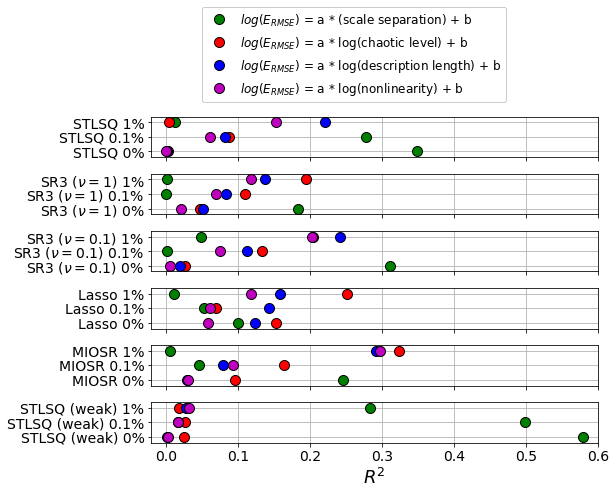

In [10]:
ms = 10
plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(6, 1, hspace=0.4, wspace=0)
opt_list = ['STLSQ', r'SR3 ($\nu = 1$)', r'SR3 ($\nu = 0.1$)', r'Lasso', r'MIOSR', 'STLSQ (weak)']
for i in range(6):
    plt.subplot(gs[i])
    plt.plot(r_values_scale[i * 3: (i + 1) * 3], np.arange(3), 'go', markersize=ms, markeredgecolor='k', label=r'$log(E_{RMSE})$ = a * (scale separation) + b')
    plt.plot(r_values_chaos[i * 3: (i + 1) * 3], np.arange(3), 'ro', markersize=ms, markeredgecolor='k',label=r'$log(E_{RMSE})$ = a * log(chaotic level) + b')
    plt.plot(r_values_syntax[i * 3: (i + 1) * 3], np.arange(3), 'bo', markersize=ms, markeredgecolor='k',label=r'$log(E_{RMSE})$ = a * log(description length) + b')
    plt.plot(r_values_nonlinear[i * 3: (i + 1) * 3], np.arange(3), 'mo', markersize=ms, markeredgecolor='k',label=r'$log(E_{RMSE})$ = a * log(nonlinearity) + b')
    plt.grid(True)
    plt.yticks(np.arange(3), fontsize=14)
    ax = plt.gca()
    plt.xlim(-0.02, 0.6)
    plt.ylim(-0.4, 2.4)
    ax.set_yticklabels([opt_list[i] + ' 0%', opt_list[i] + ' 0.1%', opt_list[i] + ' 1%'])
    if i == 0:
        plt.legend(fontsize=12, framealpha=1, ncol=1, bbox_to_anchor=(0.1, 1.2))
    if i != 5:
        ax.set_xticklabels([])

plt.xlabel(r'$R^2$', fontsize=18)
plt.xticks(fontsize=14)
plt.savefig('Pictures/best_r2_values_rmse_error.pdf', bbox_inches = 'tight')
plt.show()

### Now we repeat with the coefficient errors instead of the RMSE errors

In [11]:
error_list = [(avg_coef_error_STLSQ_AIC, std_coef_error_STLSQ_AIC),
              (avg_coef_error_STLSQ_AIC_01, std_coef_error_STLSQ_AIC_01),
              (avg_coef_error_STLSQ_AIC_1, std_coef_error_STLSQ_AIC_1),
              (avg_coef_error_SR3_AIC, std_coef_error_SR3_AIC),
              (avg_coef_error_SR3_AIC_01, std_coef_error_SR3_AIC_01),
              (avg_coef_error_SR3_AIC_1, std_coef_error_SR3_AIC_1),
              (avg_coef_error_SR3_nu01_AIC, std_coef_error_SR3_nu01_AIC),
              (avg_coef_error_SR3_nu01_AIC_01, std_coef_error_SR3_nu01_AIC_01),
              (avg_coef_error_SR3_nu01_AIC_1, std_coef_error_SR3_nu01_AIC_1),
              (avg_coef_error_Lasso_AIC, std_coef_error_Lasso_AIC),
              (avg_coef_error_Lasso_AIC_01, std_coef_error_Lasso_AIC_01),
              (avg_coef_error_Lasso_AIC_1, std_coef_error_Lasso_AIC_1),
              (avg_coef_error_MIOSR_AIC, std_coef_error_MIOSR_AIC),
              (avg_coef_error_MIOSR_AIC_01, std_coef_error_MIOSR_AIC_01),
              (avg_coef_error_MIOSR_AIC_1, std_coef_error_MIOSR_AIC_1),
              (avg_coef_error_STLSQ_AICwf, std_coef_error_STLSQ_AICwf),
              (avg_coef_error_STLSQ_AICwf_01, std_coef_error_STLSQ_AICwf_01),
              (avg_coef_error_STLSQ_AICwf_1, std_coef_error_STLSQ_AICwf_1),]
scale_sort = np.argsort(scale_list_avg)
scale_list_sorted = np.sort(scale_list_avg)
chaos_sort = np.argsort(lyap_list)
chaos_list_sorted = np.sort(lyap_list)
syntax_sort = np.argsort(medl_list)
syntax_list_sorted = np.sort(medl_list)
nonlinear_sort = np.argsort(nonlinear_sum)
nonlinear_list_sorted = np.sort(nonlinear_sum)
r_values_scale = []
r_values_chaos = []
r_values_syntax = []
r_values_nonlinear = []
for i in range(len(error_list)):
    avg_coef_error, std_coef_error = error_list[i]
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(
        scale_list_sorted, np.log(avg_coef_error[scale_sort])
    )
    r_values_scale.append(r_value1 ** 2)

    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
        np.log(chaos_list_sorted), np.log(avg_coef_error[chaos_sort])
    )
    r_values_chaos.append(r_value2 ** 2)

    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
        np.log(syntax_list_sorted), np.log(avg_coef_error[syntax_sort])
    )
    r_values_syntax.append(r_value2 ** 2)
    
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(
        np.log(nonlinear_list_sorted), np.log(avg_coef_error[nonlinear_sort])
    )
    r_values_nonlinear.append(r_value2 ** 2)


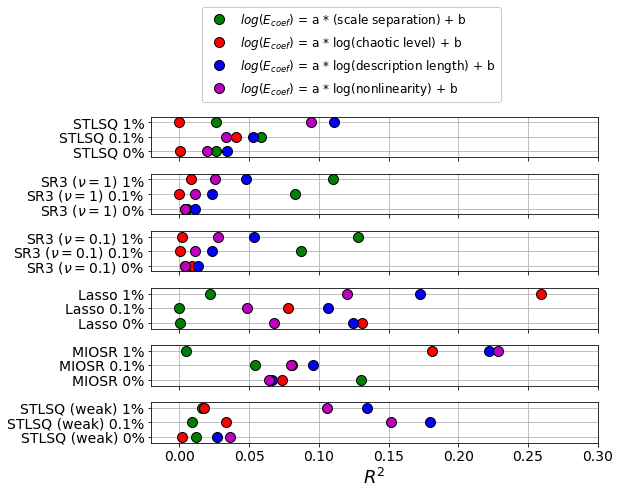

In [12]:
ms = 10
plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(6, 1, hspace=0.4, wspace=0)
opt_list = ['STLSQ', r'SR3 ($\nu = 1$)', r'SR3 ($\nu = 0.1$)', r'Lasso', r'MIOSR', 'STLSQ (weak)']
# plt.subplot(gs[0])
for i in range(6):
    plt.subplot(gs[i])
    plt.plot(r_values_scale[i * 3: (i + 1) * 3], np.arange(3), 'go', markersize=ms, markeredgecolor='k', label=r'$log(E_{coef})$ = a * (scale separation) + b')
    plt.plot(r_values_chaos[i * 3: (i + 1) * 3], np.arange(3), 'ro', markersize=ms, markeredgecolor='k',label=r'$log(E_{coef})$ = a * log(chaotic level) + b')
    plt.plot(r_values_syntax[i * 3: (i + 1) * 3], np.arange(3), 'bo', markersize=ms, markeredgecolor='k',label=r'$log(E_{coef})$ = a * log(description length) + b')
    plt.plot(r_values_nonlinear[i * 3: (i + 1) * 3], np.arange(3), 'mo', markersize=ms, markeredgecolor='k',label=r'$log(E_{coef})$ = a * log(nonlinearity) + b')
    plt.grid(True)
    plt.yticks(np.arange(3), fontsize=14)
    ax = plt.gca()
    plt.xlim(-0.02, 0.3)
    plt.ylim(-0.4, 2.4)
    ax.set_yticklabels([opt_list[i] + ' 0%', opt_list[i] + ' 0.1%', opt_list[i] + ' 1%'])
    if i == 0:
        plt.legend(fontsize=12, framealpha=1, ncol=1, bbox_to_anchor=(0.1, 1.2))
    if i != 5:
        ax.set_xticklabels([])

plt.xlabel(r'$R^2$', fontsize=18)
plt.xticks(fontsize=14)
plt.savefig('Pictures/best_r2_values_coef_error.pdf')
plt.show()